
# Instructions

- Ce TP peut être rendu individuellement, en binôme, ou éventuellement en trinôme.
- Vous pouvez utiliser Internet comme aide ou m'envoyer un email en cas de blocage [victor.priser@telecom-paris.fr](mailto:victor.priser@telecom-paris.fr).
- Il est nécessaire d'écrire du code, mais aussi de justifier vos hypothèses et calculs en Markdown.
- Le TP est à rendre avant le 19 novembre à 21h sur eCampus, au format PDF. Pour cela, exportez le fichier `.ipynb` en `.pdf` (n'oubliez pas de le compiler au préalable en précisant votre biôme).



# **Partie I**

# Étude de Cas : Test du Chi-Deux pour l'Indépendance

## Problème
Nous voulons tester si la répartition des étudiants dans trois spécialités
(Informatique, Mathématiques, Physique) dépend de leur région d'origine
(Île-de-France, Rhône-Alpes, PACA). Pour ce faire, nous utiliserons un test du chi-deux.

## Hypothèses :
- H0 : La spécialité choisie est indépendante de la région d'origine.
- H1 : La spécialité choisie dépend de la région d'origine.

## Tableau de contingence observé
Le tableau ci-dessous montre le nombre d'étudiants dans chaque spécialité selon leur région :

In [66]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [67]:
# Tableau de contingence (observations)
data = np.array([[30, 25, 15],   # Île-de-France
                 [20, 15, 25],   # Rhône-Alpes
                 [25, 20, 15]])  # PACA

# Création d'un DataFrame pour une meilleure lisibilité
regions = ['Île-de-France', 'Rhône-Alpes', 'PACA']
specialties = ['Informatique', 'Mathématiques', 'Physique']
observed = pd.DataFrame(data, index=regions, columns=specialties)

# Affichage du tableau
observed


,Informatique,Mathématiques,Physique
Île-de-France,30,25,15
Rhône-Alpes,20,15,25
PACA,25,20,15


### Calcul manuel de la statistique du chi-deux et de la p-valeur


$i$ désigne les lignes du tableau et $j$ désigne les colonnes.


La statistique du $\chi^2$ est la suivante :
$$
\chi^2 = \sum_{i,j} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$
où $O_{ij}$ sont les valeurs observées et $E_{ij}$ sont les valeurs attendues sous l'hypothèse $H_0$. Ce qui veut dire que la propotion d'individus dans la matière $j$:
$
  \frac{E_{ij}}{\sum_k E_{ik}}
$ est indépendante de la région considérée $i$ pour tout $j$. Et aussi $\sum_j E_{ij} = \sum_j O_{ij}$







## Question
 Quel est le tableau $E_{ij}$ (sous la forme d'un `np.array` nommé *expected*) de la répartition attendue des étudiants ?


In [68]:
# expected est un array numpy tel que np.shape(expected)=(3,3)

sum_IDF = data[0][0] + data[0][1] + data[0][2]
sum_Rhone = data[1][0] + data[1][1] + data[1][2]
sum_PACA = data[2][0] + data[2][1] + data[2][2]

f_IDF_info = data[0][0] / sum_IDF
f_Rhone_info = data[1][0] / sum_Rhone
f_PACA_info = data[2][0] / sum_PACA

f_IDF_maths = data[0][1] / sum_IDF
f_Rhone_maths = data[1][1] / sum_Rhone
f_PACA_maths = data[2][1] / sum_PACA

f_IDF_phy = data[0][2] / sum_IDF
f_Rhone_phy = data[1][2] / sum_Rhone
f_PACA_phy = data[2][2] / sum_PACA


f_info_moy = 1/3 * (f_IDF_info + f_Rhone_info + f_PACA_info)
f_maths_moy = 1/3 * (f_IDF_maths + f_Rhone_maths + f_PACA_maths)
f_phy_moy = 1/3 * (f_IDF_phy + f_Rhone_phy + f_PACA_phy)

# A remplir

expected = np.zeros((3,3))

expected[0][0] = f_info_moy * sum_IDF
expected[1][0] = f_info_moy * sum_Rhone
expected[2][0] = f_info_moy * sum_PACA

expected[0][1] = f_maths_moy * sum_IDF
expected[1][1] = f_maths_moy * sum_Rhone
expected[2][1] = f_maths_moy * sum_PACA

expected[0][2] = f_phy_moy * sum_IDF
expected[1][2] = f_phy_moy * sum_Rhone
expected[2][2] = f_phy_moy * sum_PACA


# Création d'un DataFrame pour les fréquences attendues
regions = ['Île-de-France', 'Rhône-Alpes', 'PACA']
specialties = ['Informatique', 'Mécanique', 'Énergie']
expected_df = pd.DataFrame(expected, index=regions, columns=specialties)

# Affichage des fréquences attendues
print("Fréquences attendues :")
print(expected_df)


Fréquences attendues :
               Informatique  Mécanique    Énergie
Île-de-France     27.500000  21.944444  20.555556
Rhône-Alpes       23.571429  18.809524  17.619048
PACA              23.571429  18.809524  17.619048


## Question:

Calculer la statisique du $\chi^2$ (variable *chi2_manual*).

In [69]:
# Calcul manuel du chi-deux

chi2_manual = 0

for i in range(3) :
    for j in range(3) :
        chi2_manual += (data[i][j] - expected[i][j])**2 / expected[i][j]

# Affichage du résultat
print(f"Statistique du chi-deux : {chi2_manual:.4f}")

Statistique du chi-deux : 7.1102


Ensuite, nous utilisons cette statistique pour calculer manuellement la p-valeur.

Cette p-valeur est obtenue à partir de la distribution du chi-deux en utilisant le nombre de degrés de liberté  $df = (r - 1) \times (c - 1)
$, où $ r $ est le nombre de lignes et $ c $ est le nombre de colonnes du tableau.

Si on note $t$ la statistique du $\chi^2$ calculée. $T$ une distribution du $\chi^2$ à $df$ degrès de liberté, la p-valeur est donnée par:
$$
   p_{val} := \mathbb P(T\ge t)
$$

### Visualisation :
- **Distribution du chi-deux** : Le premier graphique montre la courbe de la densité de probabilité du chi-deux pour les degrés de liberté donnés. La ligne verticale rouge représente la valeur du chi-deux observée dans notre cas.
- **Fonction de répartition complémentaire (1-CDF)** : Le second graphique montre la probabilité de dépassement de la statistique observée (1 - CDF). Cette courbe permet de visualiser la p-valeur obtenue.

*Rappel* Une distribution du $\chi^2$ à $df$ degrès de liberté est la loi de
$$
  \sum_{i=1}^{df} X_i^2,
$$
où $(X_i)\sim_{i.i.d.}\mathcal N(0,1)$.

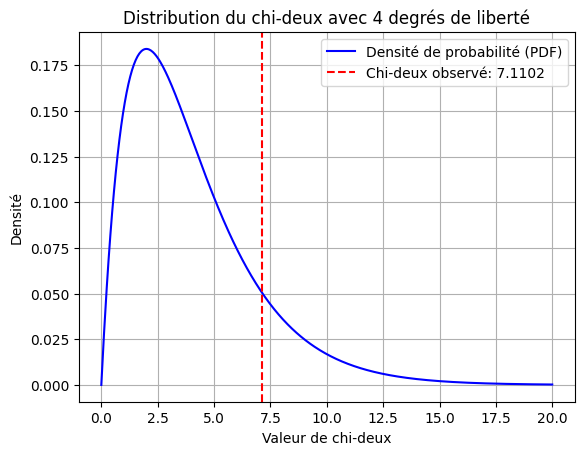

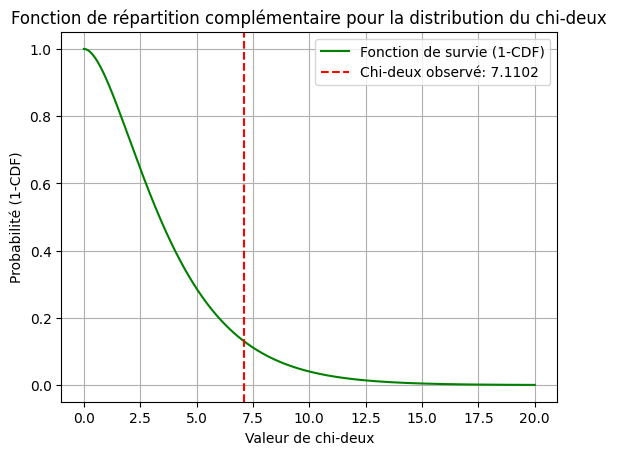

In [70]:
# Tracé de la distribution du chi-deux et de la fonction de survie (1-CDF)
dof = 4
x = np.linspace(0, 20, 500)
y = chi2.pdf(x, df=dof)  # Densité de probabilité du chi-deux
y_surv = 1 - chi2.cdf(x, df=dof)  # Fonction de survie (1-CDF)

# Tracé de la densité
#plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Densité de probabilité (PDF)", color='blue')
plt.axvline(chi2_manual, color='red', linestyle='--', label=f"Chi-deux observé: {chi2_manual:.4f}")
plt.title(f"Distribution du chi-deux avec {dof} degrés de liberté")
plt.xlabel("Valeur de chi-deux")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()

# Tracé de la fonction de répartition complémentaire (1-CDF)
#plt.figure(figsize=(10, 6))
plt.plot(x, y_surv, label="Fonction de survie (1-CDF)", color='green')
plt.axvline(chi2_manual, color='red', linestyle='--', label=f"Chi-deux observé: {chi2_manual:.4f}")
plt.title(f"Fonction de répartition complémentaire pour la distribution du chi-deux")
plt.xlabel("Valeur de chi-deux")
plt.ylabel("Probabilité (1-CDF)")
plt.legend()
plt.grid(True)
plt.show()

## Question
Calculez la p-valeur $p_{val}$ (variable *p_val_manual*) ?

In [71]:
# Calcul de la p-valeur manuellement à partir de la distribution du chi-deux

p_val_manual = 1 - chi2.cdf(chi2_manual, df=dof)

print(f"P-valeur calculée manuellement : {p_val_manual:.4f}")

P-valeur calculée manuellement : 0.1302


## Utilisation de la libriairie python


## Question

A l'aide de la fonction *chi2_contingency* (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html), retrouvez la p-valeur trouvé manuellement à la question précédente (donnez la valeur de *p_val*).




In [72]:
# Test du chi-deux
from scipy.stats import chi2_contingency

# A remplir
p_val = 0

obs = np.array(data)
res = chi2_contingency(obs)

p_val = res.pvalue

# Résultats
print(f"P-value : {p_val:.4f}")


P-value : 0.1280


## Question

Quelle conclusion tirez-vous en fonction de la valeur de cette p-valeur ? Dans notre cas, que pouvons-nous en déduire ? Que pouvons-nous dire de la taille de notre jeu de données quant à la validité du test que nous venons de réaliser ?

## Réponse


1) **Conclusion sur la p-valeur :**

En général, on compare la p-valeur à un seuil de signification, souvent fixé à 0,05.
p_val > 0.05
Donc, nous ne rejetons pas l'hypothèse nulle. Cela signifie qu'il n'y a pas suffisament de preuves pour affirmer que les résultatas observés sont significatifs.


2) **Validité du test réalisé et taille du jeu de données :**

Si la taille de l'échantillon est trop petite, il se peut que l'étude ne soit pas fiable. Il faudrait alors augmenter la taille de l'échantillon pour obtenir une p-valeur plus fiable.

Dans notre cas, le jeu de données contient 190 étudiants. On peut donc supposer que le test réalisé n'est pas valide et qu'un jeu de données plus grand permettrait d'obtenir de meilleurs résultats.


# **Partie II**

# A/B Test : Impact d'une augmentation tarifaire sur le nombre d'adhérents

Dans cette seconde partie, nous allons simuler un A/B test pour une entreprise en ligne qui souhaite savoir si l'augmentation de son tarif d'abonnement va affecter le nombre d'adhérents.

- **Groupe A** : Ancien tarif appliqué dans la majorité des régions.
- **Groupe B** : Nouveau tarif appliqué dans une région test (l'Alsace).
  
Nous allons comparer les taux d'adhésion dans chaque groupe afin de déterminer si l'augmentation du tarif a un impact significatif sur le nombre d'adhérents.

#### Objectifs :
- Simuler un A/B test.
- Utiliser un test statistique pour comparer les taux de conversion entre deux groupes (A et B).


In [73]:
import pandas as pd

# Taille des échantillons
n_A = 1000  # Taille du groupe A
n_B = 1000  # Taille du groupe B

# Taux d'adhésion dans chaque groupe (simulation)
# Groupe A : ancien tarif
conversion_rate_A = 0.10  # 10% d'adhérents avec l'ancien tarif
# Groupe B : nouveau tarif
conversion_rate_B = 0.08  # 8% d'adhérents avec le nouveau tarif (hypothèse)

# Génération des adhésions pour chaque groupe
np.random.seed(42)
group_A = np.random.binomial(1, conversion_rate_A, n_A)
group_B = np.random.binomial(1, conversion_rate_B, n_B)

# Création d'un DataFrame pour stocker les résultats
data = pd.DataFrame({
    'Groupe': ['A'] * n_A + ['B'] * n_B,
    'Adhérent': np.concatenate([group_A, group_B])
})

# Affichage d'un aperçu des données
data.head()


,Groupe,Adhérent
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0


 Nous commencerons par calculer le taux d'adhésion dans chaque groupe.


In [74]:
# Calcul du taux d'adhésion pour chaque groupe
conversion_A = data[data['Groupe'] == 'A']['Adhérent'].mean()
conversion_B = data[data['Groupe'] == 'B']['Adhérent'].mean()

print(f"Taux d'adhésion Groupe A (ancien tarif) : {conversion_A * 100:.2f}%")
print(f"Taux d'adhésion Groupe B (nouveau tarif) : {conversion_B * 100:.2f}%")


# Calcul des taux d'adhésion observés
success_A = group_A.sum()
success_B = group_B.sum()
t_A = success_A / n_A
t_B = success_B / n_B


Taux d'adhésion Groupe A (ancien tarif) : 10.00%
Taux d'adhésion Groupe B (nouveau tarif) : 8.90%


### Test de proportion pour comparer les taux d'adhésion

Nous allons utiliser un **test de proportion** pour comparer les taux d'adhésion entre les deux groupes A et B. Ce test permet de vérifier si la différence entre les taux d'adhésion est statistiquement significative.

#### Hypothèses :
- **Hypothèse nulle $ H_0 $** : Il n'y a pas de différence significative entre les taux d'adhésion des deux groupes.
- **Hypothèse alternative $ H_1 $** : Il existe une différence significative entre les taux d'adhésion des deux groupes.






## Question

Ecrire un test pour valider ou non: l'hypothèse $H_0$ ?  (p-valeur, etc)

*vous pouvez modifier le generateur pour verifier la cohérence*

*indice*: Supposez que la statistique recherchée est la moyenne de $(X_i)_{1\le i\le n_a}$ et de $(Y_i)_{1\le i\le n_b}$ où $X_i\sim_{i.i.d} \text{Bernouilli}(p_a)$ et $Y_i\sim_{i.i.d} \text{Bernouilli}(p_b)$.
L'hypothèse $H_0$ est donc $p_a =p_b$.
Pour ecrire un test il faut ecrire un théorème central limite sur $X_i$ et $Y_i$ puis faire transformation affine du vecteur  $(\sqrt{n_a}\frac 1{n_a} \sum_{i=1}^{n_a}(X_i-p_a), \sqrt{n_b} \frac 1{n_b}\sum_{i=1}^{n_b} (Y_i-p_b))$ de telle sorte que les quantités inconnues $p_a=p_b$ disparaissent. Vous connaissez la loi limite de cette transformation affine et vous savez écrire la statistique

(code et théorie en expliquant les choix faits)

In [75]:
V_X1 = 0
for i in range(n_A) :
    V_X1 += 1/n_A * (group_A[i] - t_A)**2

V_Y1 = 0
for i in range(n_B) :
    V_Y1 += 1/n_B * (group_B[i] - t_B)**2

r1 = 1/np.sqrt(n_A) 
r2 = -1/np.sqrt(n_B)

V = r1**2 * V_X1 + r2**2 * V_Y1

s = (t_A-t_B)/np.sqrt(V_X1/n_A + V_Y1/n_B) 

p_valeur = 1 - chi2.cdf(s, df=1)
print(f"La p-valeur calculée manuellement est : {p_valeur:.4f}")


La p-valeur calculée manuellement est : 0.3591


## Réponse

On calcule d'abord $V(X_1)$, qui est une fonction de $t_A$.
$V(X_1) = t_A - t_A^2$ car $X_i = X_i^2$.
De même, $V(Y_1)$ est une fonction de $t_B$.

On veut que $r_1*sqrt(n_A)*(t_A-p_A) + r_2*sqrt(n_B)*(t_B-p_B)$ soit une quantité indépendante de $p_A$ et $p_B$ sous H0.
Donc on veut $r_1*sqrt(n_A)*p_A = -r_2*sqrt(n_B)*p_B$
On cherche les bonnes valeurs de $r_1$ et $r_2$, en sachant que $p_a =p_b$.

Donc on choisit $r1 = 1/sqrt(n_A)$ et $r2 = -1/sqrt(n_B)$

Puis, on calcule la p_valeur : p_valeur = 0,3591

On peut ensuite modifier le générateur, pour vérifier la cohérence.

On remarque que la p_valeur est élevée donc on ne peut rejeter pas l'hypothèse nulle $p_a =p_b$. Il n'y a pas assez de preuves pour conclure qu'il n'y a pas de différence significative entre les taux d'adhésion des deux groupes.

# **Partie III**

Afin d'acquérir de nouveaux clients, une banque en ligne investit beaucoup d'argent Boogle Ads, afin d'apparaître dans les premiers résultats sponsorisés lors des recherches internet utilisant le moteur Boogle. La banque souhaite évaluer la pertinence de cet investissement.

La banque envisage d'abord de cesser momentanément l'investissement pour observer ce qui se passe. Cette solution est rejetée car le nombre d'abonnés est sujet à de fortes variations mensuelles : il serait donc impossible de déterminer si une éventuelle baisse du nombre d'abonnés est due à la coupure de Boogle Ads ou simplement aux tendances du marché (changement de conjoncture économique, tendances saisonnières, offres promotionnelles des banques concurrentes, etc.).

La banque décide d'effectuer un **geotest**. Elle décide de supprimer sa souscription à Boogle Ads uniquement dans une région de France, puis compare ce qui se passe dans cette région à ce qui se passe dans les autres régions, pour lesquelle la publicité a été maintenue.

In [76]:
# Dans cette étape, nous générons les données pour les 6 régions sur 30 mois. Les 12 premiers mois représentent
# la période avant la suppression de l'investissement publicitaire dans la région Est, et les 18 mois suivants
# incluent les 6 mois supplémentaires après la suppression. Chaque région a des données générées comme une somme
# d'un modèle AR commun et d'une variable gaussienne spécifique à chaque région avec une moyenne régionale.
# Après la suppression de l'investissement, la moyenne de la région Est change.

# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Paramètres communs
np.random.seed(42)
regions = ['Nord', 'Est', 'Ouest', 'Sud-ouest', 'Sud-Est', 'Centre']
n_months = 24
additional_months = 6
noise_std = 1  # Petite variance pour les variables aléatoires spécifiques aux régions
offset = 40

# Moyenne régionale m(i) pour chaque région (valeur avant et après suppression pour Est)
region_means = {
    'Nord': 9, 'Est': 8, 'Ouest': 15, 'Sud-ouest': 1, 'Sud-Est': 4, 'Centre': 2
}
region_mean_post_est = 3  # Nouvelle moyenne pour Est après suppression de l'investissement

# Paramètre AR commun à toutes les régions
ar_param = 0.7

# Génération des données AR communes
def generate_common_ar_data(n_months):
    data = [50]  # Valeur initiale arbitraire
    noise = np.random.normal(0, 5, n_months + additional_months)  # Bruit global
    for t in range(1, n_months + additional_months):
        data.append(ar_param * data[t-1] + noise[t])
    return np.array(data)

common_ar_data = generate_common_ar_data(n_months)

# Génération des données spécifiques à chaque région
def generate_region_data(region, n_months):
    mean = region_means[region]
    if region == 'Est':
      first_part = np.random.normal(mean, noise_std, n_months)
      second_part = np.random.normal(region_mean_post_est, noise_std, additional_months) # Changement de la moyenne pour Est après suppression
      noise = np.concatenate([first_part, second_part])
    else:
      noise = np.random.normal(mean, noise_std, n_months + additional_months)
    return common_ar_data[:n_months + additional_months] + noise + offset

# Génération des données avant et après suppression pour toutes les régions
data = {}
for region in regions:
    data[region] = generate_region_data(region, n_months)

# Mise en forme des données pour analyse
df = pd.DataFrame(data)
df.index = [f'{i+1}' for i in range(n_months + additional_months)]


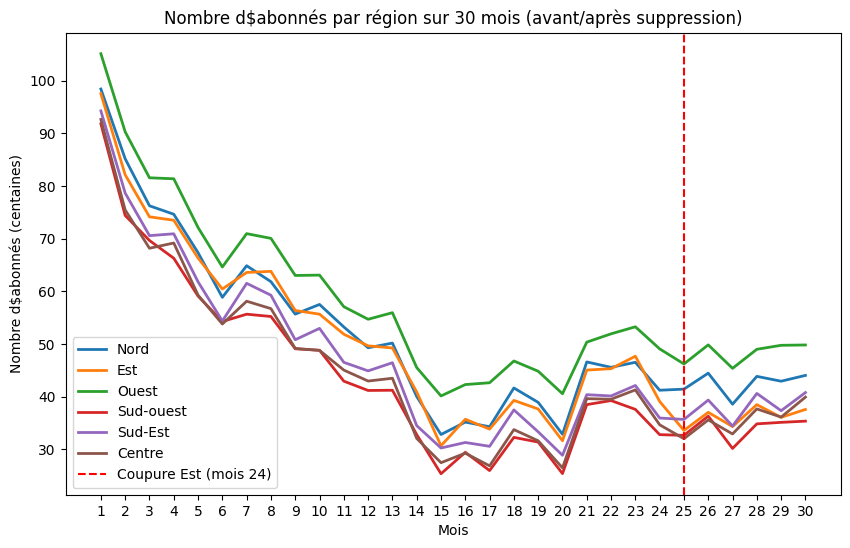

In [77]:
# Dans cette section, nous visualisons les séries temporelles pour chaque région avec une distinction de couleur
# entre la période avant et après la suppression de l'investissement publicitaire dans la région Est (mois 12).
# Les données sont tracées avec une ligne continue avant la suppression et une ligne en pointillés après.

# Visualisation des séries temporelles avec coloration avant/après suppression
plt.figure(figsize=(10,6))
for region in regions:
    plt.plot(df.index, df[region], label=f'{region}', linestyle='-', linewidth=2)

plt.axvline(x=n_months, color='r', linestyle='--', label='Coupure Est (mois 24)')
plt.title('Nombre d$abonnés par région sur 30 mois (avant/après suppression)')
plt.xlabel('Mois')
plt.ylabel('Nombre d$abonnés (centaines)')
plt.legend()
plt.show()


**Première tentative** : un simple A/B test

In [78]:
# Dans cette étape, nous effectuons un A/B test pour comparer les abonnés de la région Est après la suppression
#  à ceux des autres régions. Nous utilisons un test de Student pour vérifier si l'impact de la suppression
# est significatif.

# A/B test pour analyser l'impact de la coupure de l'investissement publicitaire
pre_coupure = df['Est'][:n_months]
post_coupure = df['Est'][n_months:]

# Comparaison entre Est et autres régions après la coupure
post_coupure_others = df.drop(columns=['Est'])[n_months:]


# A/B test (Test t de Student)
t_stat, p_value = stats.ttest_ind(post_coupure, post_coupure_others.mean(axis=1))

print(f"Résultat du A/B test: t_stat={t_stat}, p_value={p_value}")


Résultat du A/B test: t_stat=-2.942588587970685, p_value=0.014720162219492544


## Question
Quelle conclusion semble donne cet A/B test ?

Quelle critique formulez vous à l'égard de cette méthodologie ?


## Réponse

1) Conclusion de l'AB test

p_value < 0.05

La p-valeur est inférieure au seuil commun de 0,05. L'hypothèse nulle peut donc être rejetée. Il existe une différence significative entre les deux groupes testés : la campagne publicitaire avec Boogle Ads et celle sans Boogle Ads. On peut donc en conclure que l'investissement chez Boogle Ads était pertinent.

2) Critique du modèle

A nouveau, la taille de l'échantillon n'est pas mentionnée. Il se peut qu'elle soit trop petite et que les résultats manquent de robustesse. De plus, l'approche consiste à comparer l'Est avec la moyenne des autres régions après la coupure. Cela peut masquer des variations spécifiques à certaines régions. Finalement, des évènements externes peuvent influencer le nombre d'abonnés.

# Nouvelle approche

On va simuler les données de la région EST après coupure comme s'il y avait eu de la publicité et on va se comparer à ces donées simulées.

### **Construction du modèle contrefactuel par régression linéaire**

Nous allons maintenant construire un modèle de régression linéaire qui prédit les abonnés dans la région Est en utilisant
 les autres régions comme variables explicatives. Ce modèle est entraîné sur les données avant la suppression (mois 1-24),
 puis utilisé pour prédire les valeurs contrefactuelles après la suppression de l'investissement.

 Plus formellement, on note $Y_t$ la série temporelle des abonnés mensuels de l'Est, pour $t$ allant de 1 à 24. On fait l'hypothèse d'un modèle homoscédastique
 $$
Y_t = x_t^T\theta^* + \epsilon_t
 $$
où $\epsilon_t\sim \mathcal N(0,\sigma^2)$, et où $x_t^T = [1,x_t(1),\dots,x_t(5)]$ représente les nombres d'abonnés au mois $t$ dans les autres régions de France (plus l'ordonnée à l'origine, représentée par le 1).


## Question


Quel est l'estimateur des moindres carrés $\hat{\theta}$ de $\theta$ en utilisant les données pour $ t = 1, \dots, 24 $ ?

En déduire la prédiction $ Y_t $ pour $ t = 25, \dots, 30 $ si le modèle est toujours valdie pour $t>24$.

Estimateur des moindres carrés pour t = 1,...,24 :
[ 0.38864687  0.33064584  0.22166233 -0.32374152  0.38368273]


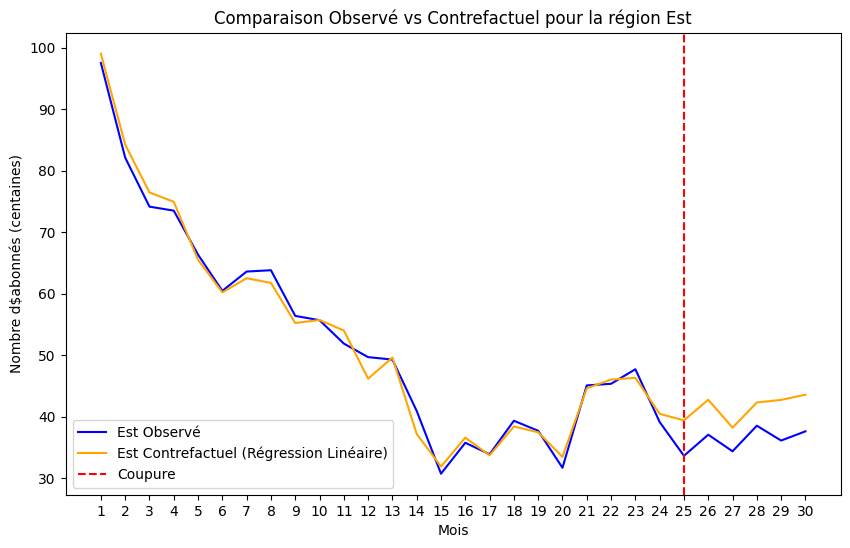

In [79]:
from sklearn.linear_model import LinearRegression

# Préparation des données pour la régression linéaire
X_train = df.drop(columns=['Est'])[:n_months]  # Autres régions (variables explicatives)
y_train = df['Est'][:n_months]  # Région Est (variable cible)

theta_hat = (np.linalg.inv((X_train.T).dot(X_train))).dot(X_train.T).dot(y_train)

print("Estimateur des moindres carrés pour t = 1,...,24 :")
print(theta_hat)


#A faire: trouver un estimateur de Y
residuals = y_train - X_train.dot(theta_hat)
sigma_squared = np.linalg.norm(residuals, ord=2)**2 / (n_months - X_train.shape[1])
sigma = np.sqrt(sigma_squared)

epsilon = np.random.normal(0, sigma, n_months)
Y_train_pred = X_train.dot(theta_hat) + epsilon
X_test = df.drop(columns=['Est'])[n_months:n_months + additional_months].values 
Y_test_pred = X_test.dot(theta_hat)
Y = np.concatenate([Y_train_pred, Y_test_pred])


# Plot des résultats observés vs contrefactuels
plt.figure(figsize=(10,6))
plt.plot(df.index,df['Est'], label='Est Observé', color='blue')
plt.plot(df.index,Y, label='Est Contrefactuel (Régression Linéaire)', color='orange', linestyle='-')
plt.axvline(x=n_months, color='r', linestyle='--', label='Coupure')
plt.title('Comparaison Observé vs Contrefactuel pour la région Est')
plt.xlabel('Mois')
plt.ylabel('Nombre d$abonnés (centaines)')
plt.legend()
plt.show()


## Question (**Calcul des intervalles de confiance**)

On veut calculer les intervalles de confiances sur le nombre d'abonnés $Y_t$ dans l'Est, après la coupure, c'est à dire pour $t>24$. Cela permettra de vérifier si la série $Y_t$ observée est cohérente avec les intervalles de confiance calculés. On calcule les intervalles de confiance sous l'hypothèse :

$$
H_0 = \text{La coupure est sans effet}.
$$


Donc, sous $H_0$, pour tout $t>24$, le même modèle homoscédastique est valable, soit $Y_t = x_t^T\theta^* + \epsilon_t$, avec le même $\theta^*$ qu'avant la coupure.

Sous $H_0$, quelle est la loi de $Y_t-\hat Y_t$ avec $\hat Y_t = \hat\theta^T x_t $.

En déduire un intervale de confiance de $ Y_t$ sous $H_0$ pour $t>24$.

(code et théorie en expliquant les choix faits)


## Réponse

Sous l'hypothèse $H_0$, les erreurs suivent une distribution normale centrée réduite $N(0,σ^2)$.

Donc $Y_t-\hat Y_t$ suit une loi normale centrée réduite :

$Y_t-\hat Y_t\sim \mathcal N(0,\sigma^2 (1 + x_t^T inv((X^TX)) x_t))$

On a donc $(Y_t-\hat Y_t)/(sigma*sqrt(1+x_t^T[k]*s_k* x_t[k]))$ qui suit une loi normale centrée réduite.

On sait que l'intervalle de confiance à 95% de cette loi est [-1.96, 1.96]. O va donc en déduire l'intervalle de confiance de $Y_t$.


Prédiction : 39.37, Intervalle de confiance [95%] : [36.76, 41.99]
Prédiction : 42.74, Intervalle de confiance [95%] : [40.17, 45.30]
Prédiction : 38.19, Intervalle de confiance [95%] : [35.73, 40.65]
Prédiction : 42.29, Intervalle de confiance [95%] : [39.80, 44.78]
Prédiction : 42.71, Intervalle de confiance [95%] : [40.28, 45.14]
Prédiction : 43.55, Intervalle de confiance [95%] : [40.81, 46.29]


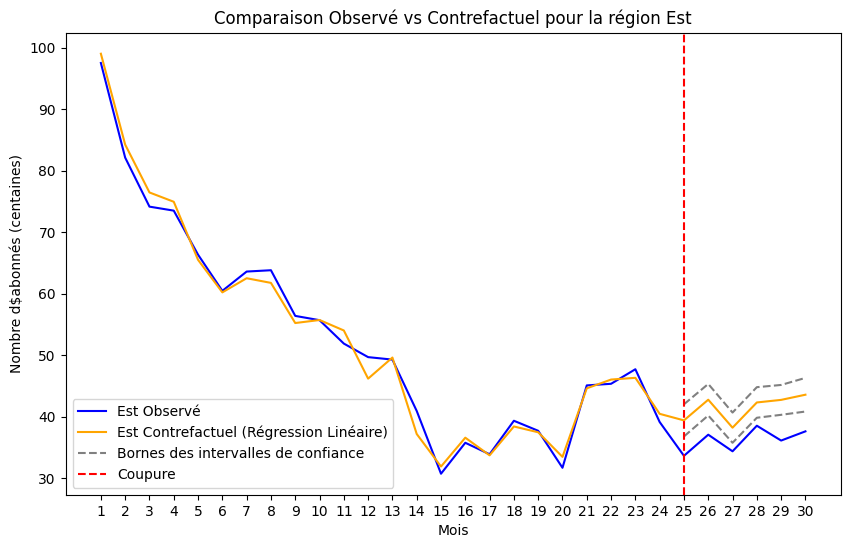

In [80]:
# Calcul des intervalles de confiance à 95%
residuals = y_train - X_train.dot(theta_hat)
sigma_squared = np.linalg.norm(residuals, ord=2)**2 / (n_months - X_train.shape[1])
sigma = np.sqrt(sigma_squared)

margin_of_error = []
for i, x_t in enumerate(X_test):
    y_pred_t = x_t.dot(theta_hat)
    se_y_pred = sigma * np.sqrt(1 + x_t @ np.linalg.inv(X_train.T @ X_train) @ x_t.T)
    margin_of_error.append(1.96 * se_y_pred)

lower_bound = Y[n_months:] - margin_of_error
upper_bound = Y[n_months:] + margin_of_error

# Affichage des intervalles de confiance
for i in range(additional_months):
    print(f"Prédiction : {Y[n_months+i]:.2f}, Intervalle de confiance [95%] : [{lower_bound[i]:.2f}, {upper_bound[i]:.2f}]")

# Plot des résultats observés vs contrefactuels
plt.figure(figsize=(10,6))
plt.plot(df.index,df['Est'], label='Est Observé', color='blue')
plt.plot(df.index, Y, label='Est Contrefactuel (Régression Linéaire)', color='orange', linestyle='-')
plt.plot(df.index[n_months:], np.concatenate([lower_bound]), label='Bornes des intervalles de confiance', color='gray', linestyle='--')
plt.plot(df.index[n_months:], np.concatenate([upper_bound]), color='gray', linestyle='--')
plt.axvline(x=n_months, color='r', linestyle='--', label='Coupure')
plt.title('Comparaison Observé vs Contrefactuel pour la région Est')
plt.xlabel('Mois')
plt.ylabel('Nombre d$abonnés (centaines)')
plt.legend()
plt.show()


## Question


En se basant sur une valeur de $ Y_t $ (avec $ t > 24 $), donnez une p-valeur associée.

Même question, mais en utilisant toutes les valeurs de $ Y_t $ pour $ t > 24 $.

(Indiquez le code et la théorie en expliquant les choix effectués)



1) Sous $H_0$, $ Y_t $ suit une distribution normale $Y_t\sim \mathcal N(\hat Y_t\ ,\sigma^2 (1 + x_t^T inv((X^TX)) x_t))$. La p-valeur est obtenue en comparant cette observation à la distribution.

2) Pour toutes les valeurs, on peut utiliser un test de Student sur les résidus standardisés.

In [81]:
# Calcul de la p-valeur pour une observation t=27

t = 26
Y_t = df['Est'][t] 
Y_hat_t = Y[t] 

standard_error = sum(margin_of_error)/(1.96*len(margin_of_error))

t_stat = (Y_t - Y_hat_t) / standard_error

p_value_t = 2 * (1 - stats.norm.cdf(abs(t_stat)))

print(f"P-valeur pour t = {t+1}: {p_value_t:.4f}")


# Calcul de la p-valeur pour tout t>24
from scipy.stats import t

Y_test_observed = df['Est'].iloc[24:].values

residuals = Y_test_observed - X_test.dot(theta_hat)
t_stat_group = np.mean(residuals) / (np.std(residuals, ddof=1) / np.sqrt(len(residuals)))

p_value_group = 2 * (1 - t.cdf(abs(t_stat_group), df=len(residuals)-1))
print("P-valeur pour l'ensemble des valeurs :", p_value_group)




P-valeur pour t = 27: 0.0031
P-valeur pour l'ensemble des valeurs : 0.00011016296700572248


C:\Users\nghie\AppData\Local\Temp\ipykernel_28260\3300314150.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_t = df['Est'][t]
